In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

data_dir = "../../data/unziped_data/"

In [2]:
with open(os.path.join(data_dir, "FTP_SABER11_20142.TXT"), "r") as f:
    for line in f:
        print(line.split('¬'))
        print(line.count('¬'))
        break

# hay un caracter raro, y hay que usar un método de codificación para esto...: '\ufeffESTU_TIPODOCUMENTO'

['\ufeffESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_ETNIA', 'ESTU_LIMITA_MOTRIZ', 'ESTU_LIMITA_INVIDENTE', 'ESTU_LIMITA_CONDICIONESPECIAL', 'ESTU_LIMITA_SORDO', 'ESTU_LIMITA_SDOWN', 'ESTU_LIMITA_AUTISMO', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_AREARESIDE', 'ESTU_VALORPENSIONCOLEGIO', 'ESTU_VECESPRESENTOEXAMEN', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_OCUPACIONPADRE', 'FAMI_OCUPACIONMADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_NIVELSISBEN', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_PISOSHOGAR', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEMICROONDAS', 'FAMI_TIENEHORNO', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEDVD', 'FAMI_TIENE_NEVERA', 'FAMI_TIENE_CELULAR', 'FAMI_TELEFONO', 'FAMI_INGRESOFMILIARMENSUAL', 'ESTU_TRABAJAACTUALMENTE', 'ESTU_RECIBESALARIO', 'ES

In [3]:
df = pd.read_csv(os.path.join(data_dir, "FTP_SABER11_20142.TXT"), sep='¬', header=0, encoding='utf-8-sig')

/home/trucupey/.virtualenvs/ICFES-SocioEconomico-u_M2eJSI/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
df.head()

ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
0                 TI          COLOMBIA           F           29/03/1996   
1                 CC          COLOMBIA           M           28/01/1992   
2                 TI          COLOMBIA           M           11/06/1997   
3                 TI          COLOMBIA           M           26/11/1998   
4                 TI          COLOMBIA           M           30/09/1996   

   PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE  \
0    20142  SB11201420582606      ESTUDIANTE         COLOMBIA   
1    20142  SB11201420191723      ESTUDIANTE         COLOMBIA   
2    20142  SB11201420256496      ESTUDIANTE         COLOMBIA   
3    20142  SB11201420044518      ESTUDIANTE         COLOMBIA   
4    20142  SB11201420364995      ESTUDIANTE         COLOMBIA   

                      ESTU_ETNIA ESTU_LIMITA_MOTRIZ  ... PUNT_COMP_CIUDADANA  \
0                            NaN                NaN  ...                  40   
1                            NaN                NaN  ...                  44   
2                        Ninguno                NaN  ...                  58   
3  Otro grupo étnico minoritario                NaN  ...                  64   
4                        Ninguno                NaN  ...                  50   

  DECIL_COMP_CIUDADANA PUNT_INGLES DECIL_INGLES DESEMP_INGLES PUNT_GLOBAL  \
0                    2          41            1            A-         199   
1                    3          41            1            A-         211   
2                    8          54            8            A1         265   
3                   10          45            3            A-         294   
4                    5          36            1            A-         228   

   ESTU_PUESTO ESTU_INSE_INDIVIDUAL  ESTU_NSE_INDIVIDUAL  \
0          900            34.553661                 NSE1   
1          821            37.474611                 NSE1   
2          331            58.327602                 NSE3   
3          152            65.708202                 NSE4   
4          666            49.493567                 NSE2   

  ESTU_ESTADOINVESTIGACION  
0                 PUBLICAR  
1                 PUBLICAR  
2                 PUBLICAR  
3                 PUBLICAR  
4                 PUBLICAR  

[5 rows x 137 columns]

In [5]:
missing = pd.isna(df).sum(axis=0) / df.shape[0]
print([(c, v) for c, v in zip(missing.index.values, missing.values)])

[('ESTU_TIPODOCUMENTO', 0.0), ('ESTU_NACIONALIDAD', 0.0), ('ESTU_GENERO', 0.0007898589458873147), ('ESTU_FECHANACIMIENTO', 0.0), ('PERIODO', 0.0), ('ESTU_CONSECUTIVO', 0.0), ('ESTU_ESTUDIANTE', 0.0), ('ESTU_PAIS_RESIDE', 0.0), ('ESTU_ETNIA', 0.10527717619916202), ('ESTU_LIMITA_MOTRIZ', 0.9991146232280984), ('ESTU_LIMITA_INVIDENTE', 0.9997042621156096), ('ESTU_LIMITA_CONDICIONESPECIAL', 0.9993938291810632), ('ESTU_LIMITA_SORDO', 0.9997575316724253), ('ESTU_LIMITA_SDOWN', 0.9999412197993758), ('ESTU_LIMITA_AUTISMO', 0.9997777373663899), ('ESTU_DEPTO_RESIDE', 3.4900744120602275e-05), ('ESTU_COD_RESIDE_DEPTO', 3.4900744120602275e-05), ('ESTU_MCPIO_RESIDE', 3.4900744120602275e-05), ('ESTU_COD_RESIDE_MCPIO', 3.4900744120602275e-05), ('ESTU_AREARESIDE', 0.003269648659719582), ('ESTU_VALORPENSIONCOLEGIO', 0.0032769961847976033), ('ESTU_VECESPRESENTOEXAMEN', 0.0032769961847976033), ('FAMI_EDUCACIONPADRE', 0.003247606084485517), ('FAMI_EDUCACIONMADRE', 0.003247606084485517), ('FAMI_OCUPACIONPADR

In [6]:
to_exclude = ['ESTU_TIPODOCUMENTO', 'PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_LIMITA_MOTRIZ', 'ESTU_LIMITA_INVIDENTE', 'ESTU_LIMITA_CONDICIONESPECIAL', 'ESTU_LIMITA_SORDO',
             'ESTU_LIMITA_SDOWN', 'ESTU_LIMITA_AUTISMO', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_RAZONRETIROCOLEGIO', 'ESTU_IESDESEADA','ESTU_MCPIOIESDESEADA',
             'ESTU_COD_PROGRAMADESEADO', 'COLE_CODIGO_ICFES', 'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE', 'COLE_NOMBRE_SEDE',
              'COLE_MCPIO_UBICACION', 'COLE_COD_DEPTO_UBICACION', 'ESTU_MCPIO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_ESTADOINVESTIGACION']
codigos = ['ESTU_COD_RESIDE_MCPIO', 'ESTU_COD_IESDESEADA', 'ESTU_COD_MCPIOIESDESEADA', 'COLE_COD_MCPIO_UBICACION', 'ESTU_COD_MCPIO_PRESENTACION']

In [9]:
df_useful = df[[col for col in df.columns.values if col not in to_exclude]]
cols = df_useful.columns.values

In [10]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [11]:
chunks_ = list(chunks(cols, len(cols)//4 + 1))
names = np.array(['Vladimir', "Nicolai", "Juan", "Leoneli"])
np.random.shuffle(names)
for n, c in zip(names, chunks_):
    print(n, c)
    print("*---*")

Vladimir ['ESTU_NACIONALIDAD' 'ESTU_GENERO' 'ESTU_FECHANACIMIENTO'
 'ESTU_ESTUDIANTE' 'ESTU_PAIS_RESIDE' 'ESTU_ETNIA' 'ESTU_DEPTO_RESIDE'
 'ESTU_COD_RESIDE_MCPIO' 'ESTU_AREARESIDE' 'ESTU_VALORPENSIONCOLEGIO'
 'ESTU_VECESPRESENTOEXAMEN' 'FAMI_EDUCACIONPADRE' 'FAMI_EDUCACIONMADRE'
 'FAMI_OCUPACIONPADRE' 'FAMI_OCUPACIONMADRE' 'FAMI_ESTRATOVIVIENDA'
 'FAMI_NIVELSISBEN' 'FAMI_PERSONASHOGAR' 'FAMI_CUARTOSHOGAR'
 'FAMI_PISOSHOGAR' 'FAMI_TIENEINTERNET' 'FAMI_TIENECOMPUTADOR'
 'FAMI_TIENELAVADORA' 'FAMI_TIENEMICROONDAS' 'FAMI_TIENEHORNO'
 'FAMI_TIENESERVICIOTV' 'FAMI_TIENEAUTOMOVIL' 'FAMI_TIENEDVD'
 'FAMI_TIENE_NEVERA']
*---*
Nicolai ['FAMI_TIENE_CELULAR' 'FAMI_TELEFONO' 'FAMI_INGRESOFMILIARMENSUAL'
 'ESTU_TRABAJAACTUALMENTE' 'ESTU_RECIBESALARIO' 'ESTU_ANOSPREESCOLAR'
 'ESTU_ANOMATRICULAPRIMERO' 'ESTU_ANOTERMINOQUINTO'
 'ESTU_ANOMATRICULASEXTO' 'ESTU_ANTECEDENTES' 'ESTU_REPROBOPRIMERO'
 'ESTU_REPROBOSEGUNDO' 'ESTU_REPROBOTERCERO' 'ESTU_REPROBOCUARTO'
 'ESTU_REPROBOQUINTO' 'ESTU_REPROBOSEXTO' 'E

## Exploration Trucupey

Trucupey 'ESTU_INSTPORCOSTOMATRICULA' 'ESTU_INSTPORUBICACION'
 'ESTU_INSTPORUNICAQUEOFRECE' 'ESTU_INSTPOROPORTUNIDADES'
 'ESTU_INSTPORAMIGOSESTUDIANDO' 'ESTU_INSTPOROTRARAZON'
 'ESTU_PROGRAMADESEADO' 'ESTU_PROGORIENTACIONVOCACIONAL'
 'ESTU_PROGPORBUSCANDOCARRERA' 'ESTU_PROGPORCOLOMBIAAPRENDE'
 'ESTU_PROGPORINTERESPERSONAL' 'ESTU_PROGPORTRADICIONFAMILIAR'
 'ESTU_PROGPORMEJORARPOSICSOCIAL' 'ESTU_PROGPORINFLUENCIAALGUIEN'
 'ESTU_EXPECTATIVAS' 'ESTU_INGRESAR_PROG_EDUSUPERIOR'
 'ESTU_PUNT_ESPERADO_LENGUAJE' 'ESTU_PUNT_ESPERADO_MATEMATICAS'
 'ESTU_PUNT_ESPERADO_INGLES' 'ESTU_SALARIO_ESPERADOBACHILLER'
 'ESTU_SALARIO_ESPERADOTECNICO' 'ESTU_SALARIO_ESPERADOPROFESI'
 'COLE_GENERO' 'COLE_NATURALEZA' 'COLE_CALENDARIO' 'COLE_BILINGUE'
 'COLE_CARACTER' 'COLE_SEDE_PRINCIPAL' 'COLE_AREA_UBICACION']

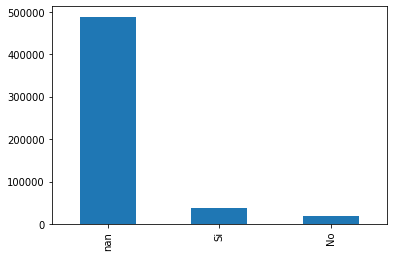

In [8]:
df.ESTU_INSTPORCOSTOMATRICULA.value_counts(dropna=False).plot.bar()


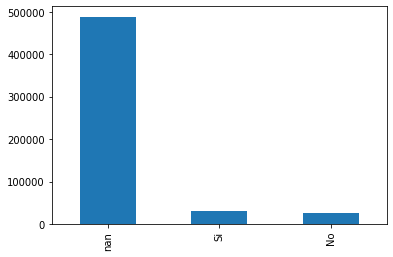

In [9]:
df.ESTU_INSTPORUBICACION.value_counts(dropna=False).plot.bar()


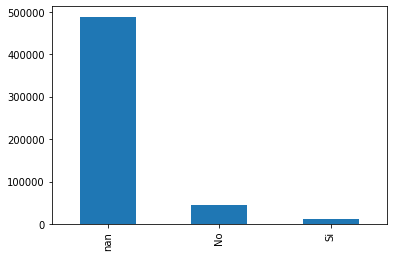

In [10]:
df.ESTU_INSTPORUNICAQUEOFRECE.value_counts(dropna=False).plot.bar()


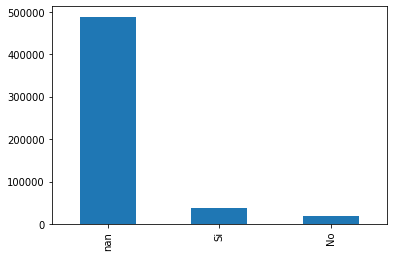

In [11]:
df.ESTU_INSTPOROPORTUNIDADES.value_counts(dropna=False).plot.bar()


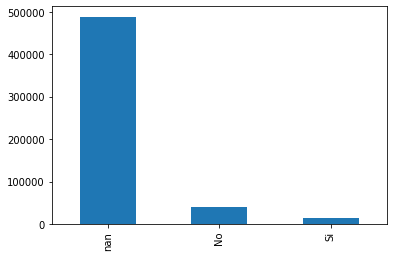

In [12]:
df.ESTU_INSTPORAMIGOSESTUDIANDO.value_counts(dropna=False).plot.bar()


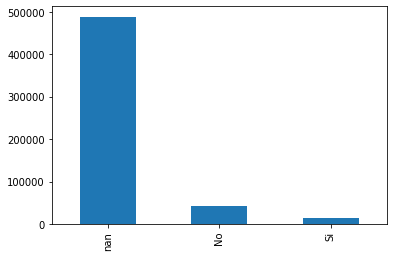

In [13]:
df.ESTU_INSTPOROTRARAZON.value_counts(dropna=False).plot.bar()


In [37]:
df.ESTU_PROGRAMADESEADO.value_counts(dropna=False).to_frame()#plot.bar()


ESTU_PROGRAMADESEADO
NaN                                                               488520
ADMINISTRACION                                                      7472
MEDICINA                                                            5006
SIN CLASIFICAR                                                      3231
PSICOLOGIA                                                          2587
ENFERMERIA                                                          2541
INGENIERIA DE SISTEMAS, TELEMATICA Y AFINES                         2292
DERECHO Y AFINES                                                    2016
INGENIERIA CIVIL Y AFINES                                           1829
INGENIERIA MECANICA Y AFINES                                        1683
DISEÑO                                                              1615
ARQUITECTURA                                                        1586
CONTADURIA PUBLICA                                                  1549
AGRONOMIA                                                           1405
COMUNICACIÓN SOCIAL, PERIODISMO Y AFINES                            1405
INGENIERIA INDUSTRIAL Y AFINES                                      1338
INGENIERIA AMBIENTAL, SANITARIA Y AFINES                            1322
EDUCACION                                                           1188
DEPORTES, EDUCACION FISICA Y RECREACION                             1003
LENGUAS MODERNAS, LITERATURA, LINGUISTICA Y AFINES                   964
ODONTOLOGIA                                                          887
INGENIERIA ELECTRONICA, TELECOMUNICACIONES Y AF...                   796
OTRAS INGENIERIAS                                                    774
MEDICINA VETERINARIA                                                 684
FORMACION RELACIONADA CON EL CAMPO MILITAR O PO...                   678
ARTES PLASTICAS, VISUALES Y AFINES                                   576
ZOOTECNIA                                                            559
ECONOMIA                                                             556
INGENIERIA DE MINAS, METALURGIA Y AFINES                             547
SALUD PUBLICA                                                        526
SOCIOLOGIA, TRABAJO SOCIAL Y AFINES                                  498
MUSICA                                                               495
INGENIERIA ELECTRICA Y AFINES                                        485
BACTERIOLOGIA                                                        484
CIENCIA POLITICA, RELACIONES INTERNACIONALES                         454
INGENIERIA ADMINISTRATIVA Y AFINES                                   447
INGENIERIA QUIMICA Y AFINES                                          446
INGENIERIA AGROINDUSTRIAL, ALIMENTOS Y AFINES                        404
BIOLOGIA, MICROBIOLOGIA Y AFINES                                     388
INGENIERIA AGRICOLA, FORESTAL Y AFINES                               312
PUBLICIDAD Y AFINES                                                  281
NUTRICION Y DIETETICA                                                273
TERAPIAS                                                             273
GEOLOGIA, OTROS PROGRAMAS DE CIENCIAS NATURALES                      212
ARTES REPRESENTATIVAS                                                194
QUIMICA Y AFINES                                                     192
MATEMATICAS, ESTADISTICA Y AFINES                                    166
FILOSOFIA, TEOLOGIA Y AFINES                                         164
INGENIERIA AGRONOMICA, PECUARIA Y AFINES                             161
FISICA                                                               158
OTROS PROGRAMAS ASOCIADOS A BELLAS ARTES                             155
ANTROPOLOGIA, ARTES LIBERALES                                        149
GEOGRAFIA, HISTORIA                                                  119
OPTOMETRIA, OTROS PROGRAMAS DE CIENCIAS DE LA S...                   116
INGENIERIA BIOMEDICA Y AFINES        

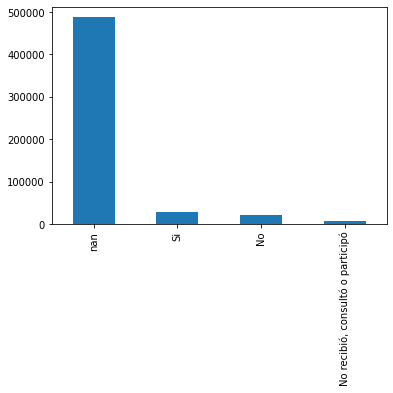

In [15]:
df.ESTU_PROGORIENTACIONVOCACIONAL.value_counts(dropna=False).plot.bar()


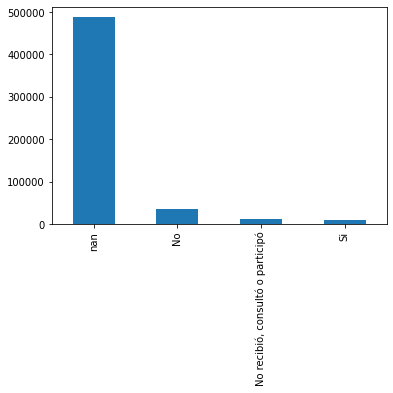

In [16]:
df.ESTU_PROGPORBUSCANDOCARRERA.value_counts(dropna=False).plot.bar()


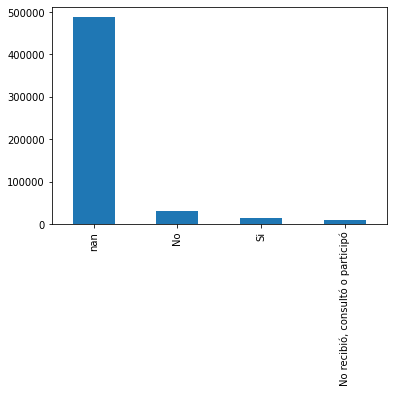

In [17]:
df.ESTU_PROGPORCOLOMBIAAPRENDE.value_counts(dropna=False).plot.bar()


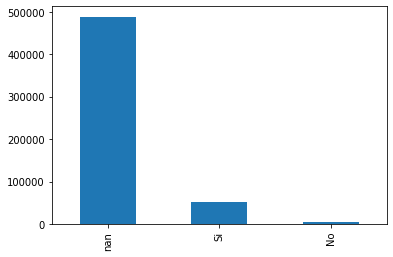

In [18]:
df.ESTU_PROGPORINTERESPERSONAL.value_counts(dropna=False).plot.bar()


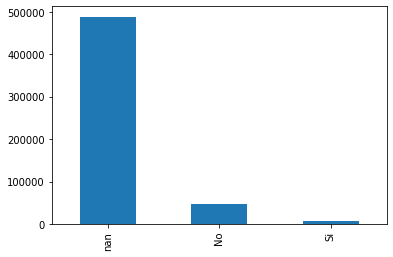

In [19]:
df.ESTU_PROGPORTRADICIONFAMILIAR.value_counts(dropna=False).plot.bar()


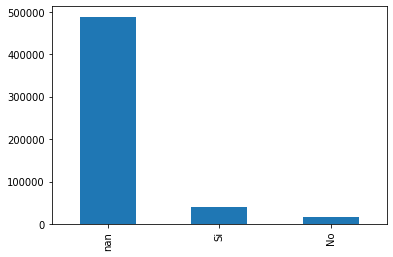

In [20]:
df.ESTU_PROGPORMEJORARPOSICSOCIAL.value_counts(dropna=False).plot.bar()


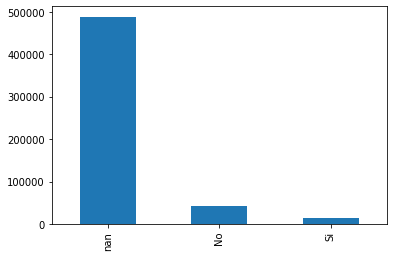

In [21]:
df.ESTU_PROGPORINFLUENCIAALGUIEN.value_counts(dropna=False).plot.bar()


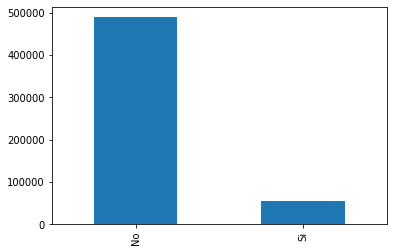

In [22]:
df.ESTU_EXPECTATIVAS.value_counts(dropna=False).plot.bar()


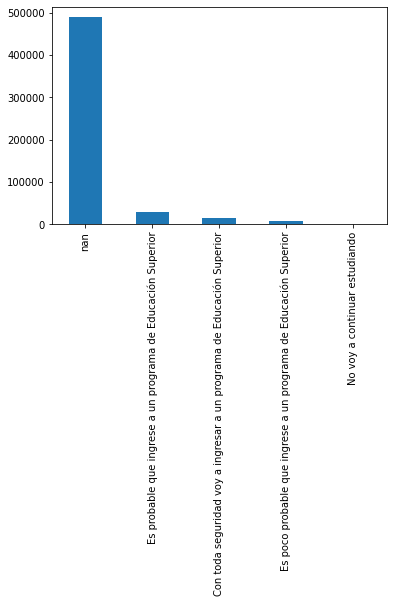

In [23]:
df.ESTU_INGRESAR_PROG_EDUSUPERIOR.value_counts(dropna=False).plot.bar()


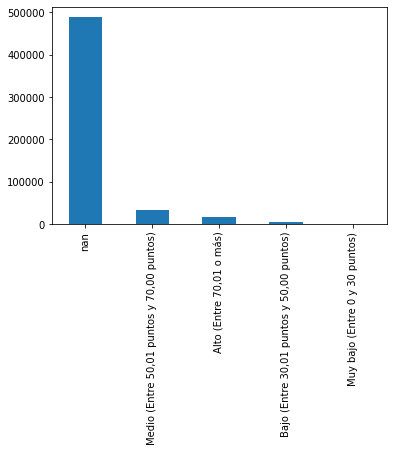

In [24]:
df.ESTU_PUNT_ESPERADO_LENGUAJE.value_counts(dropna=False).plot.bar()


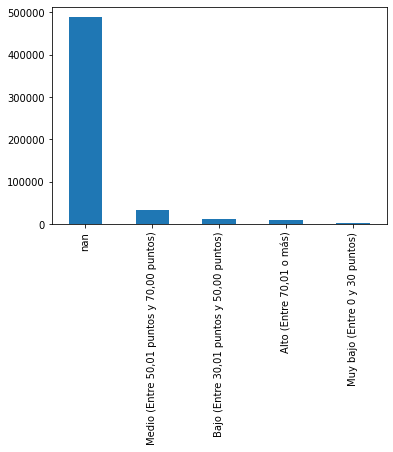

In [25]:
df.ESTU_PUNT_ESPERADO_MATEMATICAS.value_counts(dropna=False).plot.bar()


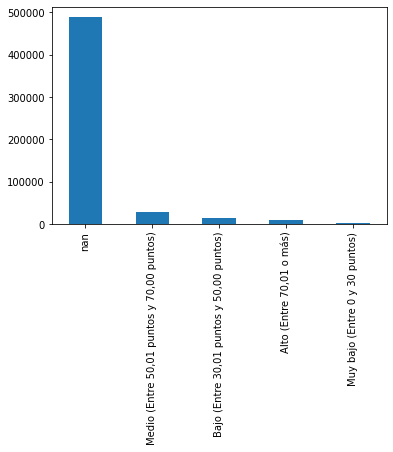

In [26]:
df.ESTU_PUNT_ESPERADO_INGLES.value_counts(dropna=False).plot.bar()


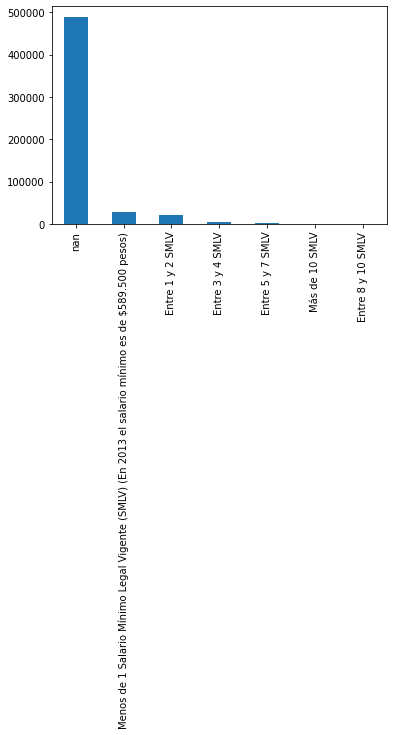

In [27]:
df.ESTU_SALARIO_ESPERADOBACHILLER.value_counts(dropna=False).plot.bar()


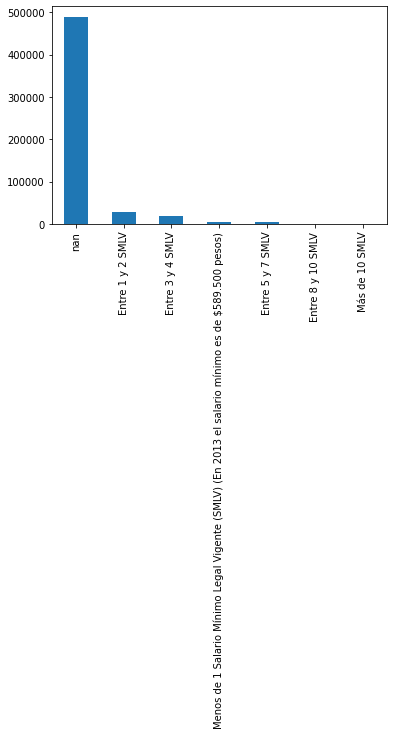

In [28]:
df.ESTU_SALARIO_ESPERADOTECNICO.value_counts(dropna=False).plot.bar()


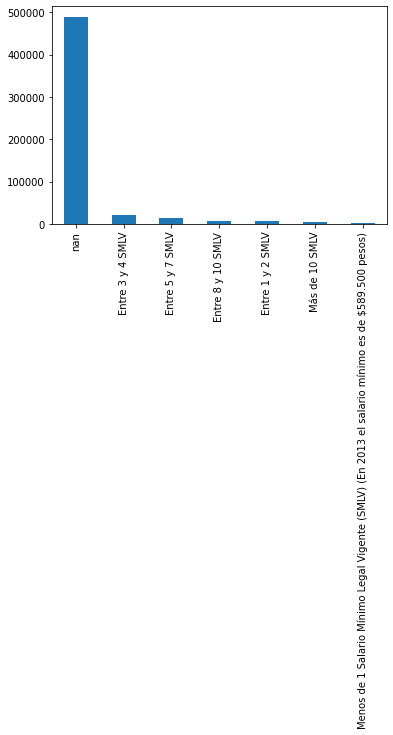

In [29]:
df.ESTU_SALARIO_ESPERADOPROFESI.value_counts(dropna=False).plot.bar()


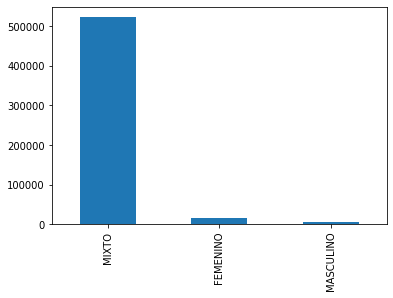

In [30]:
df.COLE_GENERO.value_counts(dropna=False).plot.bar()


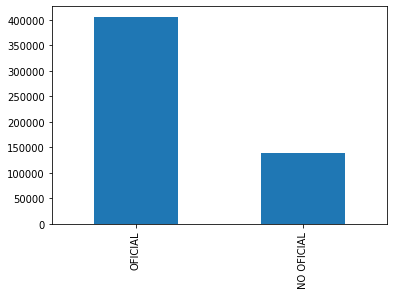

In [31]:
df.COLE_NATURALEZA.value_counts(dropna=False).plot.bar()


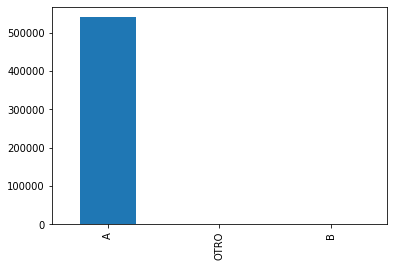

In [32]:
df.COLE_CALENDARIO.value_counts(dropna=False).plot.bar()


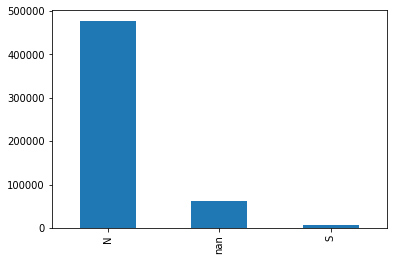

In [33]:
df.COLE_BILINGUE.value_counts(dropna=False).plot.bar()


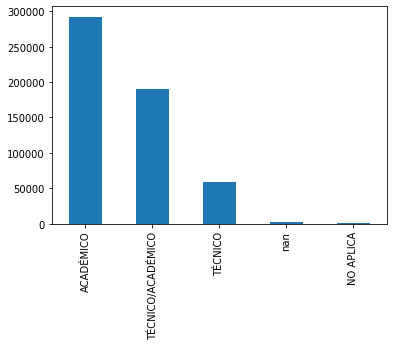

In [34]:
df.COLE_CARACTER.value_counts(dropna=False).plot.bar()


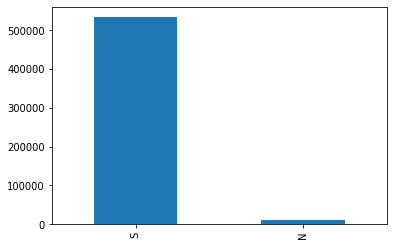

In [35]:
df.COLE_SEDE_PRINCIPAL.value_counts(dropna=False).plot.bar()


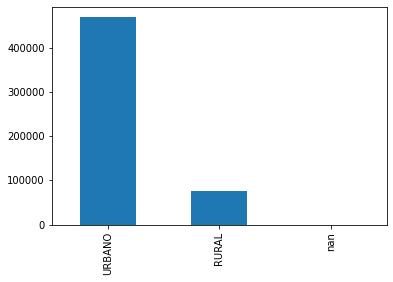

In [36]:
df.COLE_AREA_UBICACION.value_counts(dropna=False).plot.bar()


### Funciones

In [ ]:
#Para variable   'ESTU_PROGORIENTACIONVOCACIONAL' 
def orientacion_vocacional(value):
    if value=='Si':
        return 1
    elif value =='No':
        return 0
    elif value == 'No recibió, consultó o participó':
        return 0
    else:
        return np.nan

#Para variable 'ESTU_PROGPORBUSCANDOCARRERA'
def probuscando_carrera(value):
    if value=='Si':
        return 1
    elif value =='No':
        return 0
    elif value == 'No recibió, consultó o participó':
        return 0
    else:
        return np.nan  

#Para variable  'ESTU_PROGPORCOLOMBIAAPRENDE'
def procolombia_aprende(value):
    if value=='Si':
        return 1
    elif value =='No':
        return 0
    elif value == 'No recibió, consultó o participó':
        return 0
    else:
        return np.nan
    
    
def parse_S_N(val):
    if val == 'S':
        return 1
    elif val == 'N':
        return 0
    else:
        return np.nan
    
def parse_Si_No(val):
    if val == 'Si':
        return 1
    elif val == 'No':
        return 0
    else:
        return np.nan
    
def parse_espera_ingresar_edu_sup(val):
    if val == 'No voy a continuar estudiando':
        return 0
    elif val == 'Es poco probable que ingrese a un programa de Educación Superior':
        return 1
    elif val == 'Es probable que ingrese a un programa de Educación Superior':
        return 2
    elif val == 'Con toda seguridad voy a ingresar a un programa de Educación Superior':
        return 3
    else:
        return np.nan

def parse_punt_esperado(val):
    if val == 'Muy bajo (Entre 0 y 30 puntos)':
        return 0
    elif val == 'Bajo (Entre 30,01 puntos y 50,00 puntos)':
        return 1
    elif val == 'Medio (Entre 50,01 puntos y 70,00 puntos)':
        return 2
    elif val == 'Alto (Entre 70,01 o más)':
        return 3
    else:
        return np.nan
    
def parse_salar_esperado(val):
    if val == 'Menos de 1 Salario Mínimo Legal Vigente (SMLV) (En 2013 el salario mínimo es de $589.500 pesos)':
        return 0
    elif val == 'Entre 1 y 2 SMLV':
        return 1
    elif val == 'Entre 3 y 4 SMLV':
        return 2
    elif val == 'Entre 5 y 7 SMLV':
        return 3
    elif val == 'Entre 8 y 10 SMLV':
        return 4
    elif val == 'Más de 10 SMLV':
        return 5
    else:
        return np.nan
    
def parse_cole_naturaleza(val):
    if val == 'NO OFICIAL':
        return 1
    elif val == 'OFICIAL':
        return 0
    else:
        return np.nan

def parse_cole_area_ubic(val):
    if val == 'URBANO':
        return 1
    elif val == 'RURAL':
        return 0
    else:
        return np.nan
    

### Descripcion

### `Function parse_Si_No`
- ESTU_INSTPORCOSTOMATRICULA
- ESTU_INSTPORUBICACION
- ESTU_INSTPORUNICAQUEOFRECE
- ESTU_INSTPOROPORTUNIDADES
- ESTU_INSTPORAMIGOSESTUDIANDO
- ESTU_INSTPOROTRARAZON
- ESTU_PROGPORINTERESPERSONAL
- ESTU_PROGPORTRADICIONFAMILIAR
- ESTU_PROGPORMEJORARPOSICSOCIAL
- ESTU_PROGPORINFLUENCIAALGUIEN
- ESTU_EXPECTATIVAS

### ` Function parse_S_N`
- COLE_BILINGUE
- COLE_SEDE_PRINCIPAL

### `Function parce_si_no_no_recibio_o participo`
- ESTU_PROGORIENTACIONVOCACIONAL
- ESTU_PROGPORBUSCANDOCARRERA
- ESTU_PROGPORCOLOMBIAAPRENDE


### `Function parse_espera_ingresar_edu_sup`
- ESTU_INGRESAR_PROG_EDUSUPERIOR

### `Function parse_punt_esperado`
- ESTU_PUNT_ESPERADO_LENGUAJE
- ESTU_PUNT_ESPERADO_MATEMATICAS
- ESTU_PUNT_ESPERADO_INGLES

### `Function parse_salar_esperado`
- ESTU_SALARIO_ESPERADOBACHILLER
- ESTU_SALARIO_ESPERADOTECNICO
- ESTU_SALARIO_ESPERADOPROFESI

### `Function parse_cole_oficial_no_oficial`
- COLE_NATURALEZA

### `Function parse_cole_area_ubic`
- COLE_AREA_UBICACION

### `Function get_dummies`
- COLE_GENERO 
- COLE_CALENDARIO
- COLE_CARACTER


### `Se parsea con las facultades`
- ESTU_PROGRAMADESEADO


### Diccionario


In [ ]:
column_2_func = {}

column_2_func['ESTU_INSTPORCOSTOMATRICULA'] = parse_Si_No
column_2_func['ESTU_INSTPORUBICACION'] = parse_Si_No
column_2_func['ESTU_INSTPORUNICAQUEOFRECE'] = parse_Si_No
column_2_func['ESTU_INSTPOROPORTUNIDADES'] = parse_Si_No
column_2_func['ESTU_INSTPORAMIGOSESTUDIANDO'] = parse_Si_No
column_2_func['ESTU_INSTPOROTRARAZON'] = parse_Si_No
column_2_func['ESTU_PROGPORINTERESPERSONAL'] = parse_Si_No
column_2_func['ESTU_PROGPORTRADICIONFAMILIAR'] = parse_Si_No
column_2_func['ESTU_PROGPORMEJORARPOSICSOCIAL'] = parse_Si_No 
column_2_func['ESTU_PROGPORINFLUENCIAALGUIEN'] = parse_Si_No
column_2_func['ESTU_EXPECTATIVAS'] = parse_Si_No

column_2_func['COLE_BILINGUE'] = parse_S_N
column_2_func['COLE_SEDE_PRINCIPAL'] = parse_S_N              
              
column_2_func['ESTU_PROGORIENTACIONVOCACIONAL'] = orientacion_vocacional
column_2_func['ESTU_PROGPORBUSCANDOCARRERA'] = probuscando_carrera
column_2_func['ESTU_PROGPORCOLOMBIAAPRENDE'] = procolombia_aprende

column_2_func['ESTU_INGRESAR_PROG_EDUSUPERIOR'] = parse_espera_ingresar_edu_sup

column_2_func['ESTU_PUNT_ESPERADO_LENGUAJE'] = parse_punt_esperado
column_2_func['ESTU_PUNT_ESPERADO_MATEMATICAS'] = parse_punt_esperado
column_2_func['ESTU_PUNT_ESPERADO_INGLES'] = parse_punt_esperado

column_2_func['ESTU_SALARIO_ESPERADOBACHILLER'] = parse_salar_esperado
column_2_func['ESTU_SALARIO_ESPERADOTECNICO'] = parse_salar_esperado
column_2_func['ESTU_SALARIO_ESPERADOPROFESI'] = parse_salar_esperado

column_2_func['COLE_NATURALEZA'] = parse_cole_naturaleza

column_2_func['COLE_AREA_UBICACION'] = parse_cole_area_ubic


#Columns with dummies
columns_with_get_dummies = ["COLE_GENERO", "COLE_CALENDARIO", "COLE_CARACTER"]



## Exploration of information about the IES

In [5]:
df.ESTU_COD_IESDESEADA.value_counts(dropna=False).to_frame()#plot.bar()


ESTU_COD_IESDESEADA
NaN                490394
Otro                12019
8964                 4284
8894                 2667
9206                 2073
...                   ...
2902                    1
4168                    1
1749                    1
3895                    1
256                     1

[1089 rows x 1 columns]

In [9]:
df_ies = pd.read_csv(os.path.join("../../data/", "IES.csv"), delimiter=',')
df_ies.shape

(697, 20)

In [7]:
for code in df.ESTU_COD_IESDESEADA.unique():
    if code not in df_ies.codigoinsitucion.values:
        try:
            print(df[df["ESTU_COD_IESDESEADA"]==str(code)]['ESTU_IESDESEADA'].values[0])
        except:
            print("There is no IES")

/home/trucupey/.virtualenvs/ICFES-SocioEconomico-u_M2eJSI/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


UNIVERSIDAD DE CARTAGENA-CARTAGENA
nan
UNIVERSIDAD PEDAGOGICA Y TECNOLOGICA DE COLOMBIA-TUNJA
UNIVERSIDAD DE NARIÑO-PASTO
UNIVERSIDAD DEL CAUCA-POPAYAN
UNIVERSIDAD INDUSTRIAL DE SANTANDER-BUCARAMANGA
There is no IES
FUNDACION UNIVERSITARIA INTERNACIONAL DEL TROPICO AMERICANO-YOPAL
SERVICIO NACIONAL DE APRENDIZAJE-SENA-ARMENIA
UNIVERSIDAD DE LA AMAZONIA-FLORENCIA
UNIVERSIDAD DE IBAGUE-IBAGUE
CORPORACION UNIVERSITARIA LASALLISTA-CALDAS
nan
UNIVERSIDAD MARIANA-PASTO
UNIVERSIDAD SURCOLOMBIANA-NEIVA
nan
UNIVERSIDAD NACIONAL DE COLOMBIA-MEDELLIN
UNIVERSIDAD DEL NORTE-BARRANQUILLA
UNIVERSIDAD DE MEDELLIN-MEDELLIN
UNIVERSIDAD DE BOYACA - UNIBOYACA-TUNJA
nan
UNIVERSIDAD FRANCISCO DE PAULA SANTANDER-OCAÑA
INSTITUTO NACIONAL DE FORMACION TECNICA PROFESIONAL"HUMBERTO VELASQUEZ GARCIA"-CIENAGA
nan
UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA
nan
SERVICIO NACIONAL DE APRENDIZAJE-SENA-BUGA
UNIVERSIDAD DEL VALLE-BUGA
UNIVERSIDAD DEL VALLE-ZARZAL
INSTITUTO UNIVERSITARIO DE LA PAZ-BARRANCABERMEJA
UNIVERSIDAD 

In [12]:
df.ESTU_COD_IESDESEADA.values

array(['9086', 'Otro', 'Otro', ..., nan, nan, nan], dtype=object)

In [ ]:
def extract_dict(json_name, dicc_directory):
    with open(dicc_directory+json_name, 'r') as file:
        json_dict = json.load(file)
    return json_dict

dictX = extract_dict('','../../data/Diccionarios_ies/')

In [ ]:

for col in [cod for cod in codigos if 'MCPIO' in cod]:
    for file in files_mun:
        dictX = extract_dict(file,'../../data/Diccionarios_mun/')
        df_vars[col+file[:-5]] = df[col].apply(lambda x: parse_mun_X(str(x), dictX))
        
df_vars = pd.get_dummies(df_vars, columns=['ESTU_PROGRAMADESEADO'])
